### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

* Independent variables - The values that can be changed or controlled in a given model or equation.
    * The congruent or incongruent word the user saw.
* Dependent variables - The values that result from the independent variables.
    * The time it took each user to name the ink colors in equally-sized lists

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

I assume the there is no difference between the mean response time  for incongruent and congruent word lists. Type I error rate of 5%.

My null and alternative hypothesis are:

$$H_0:  \mu_{incongruent} -  \mu_{congruent} = 0$$

$$H_1:  \mu_{incongruent} -  \mu_{congruent} \neq 0$$

The null hypothesis: The difference between mean response times for congruent and incongruent word lists are the same.

The alternative hypothesis: The difference between mean times for congruent and incongruent word lists are different.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [102]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)
df = pd.read_csv('stroopdata.csv')

In [103]:
df.describe() 

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000



Measure | Congruent | Incongruent 
------------ | ------------- | ------------- 
Mean | 14.051125 | 22.015917 
Median | 14.356500 | 21.017500 
Standard Deviation | 3.559358 |	4.797057 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1170dd358>,
      dtype=object)

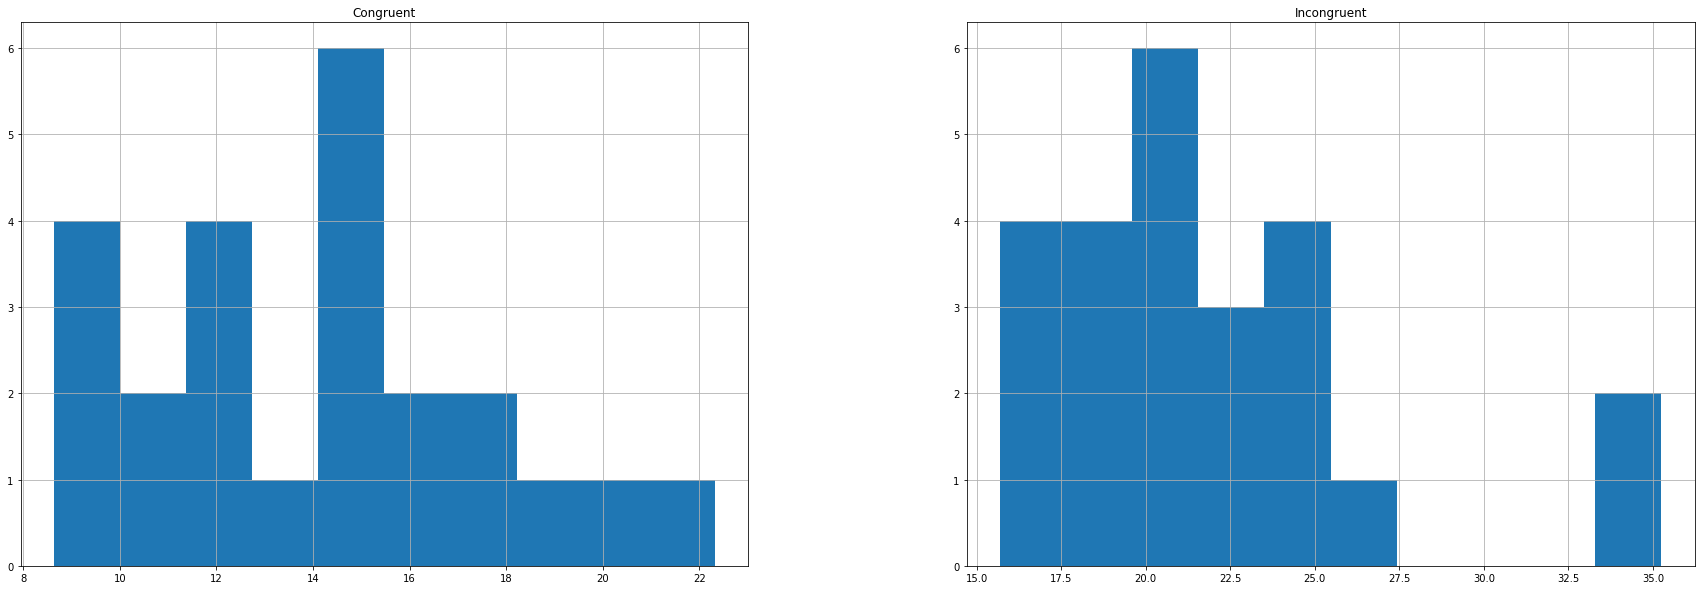

In [104]:
# Build the visualizations here
df.hist(figsize=(30, 10))

Text(0.5,1,'Congruent Q-Q Plot')

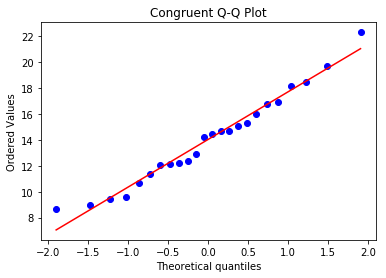

In [105]:
stats.probplot(df['Congruent'], plot= plt)
plt.title('Congruent Q-Q Plot')

Text(0.5,1,'Incongruent Q-Q Plot')

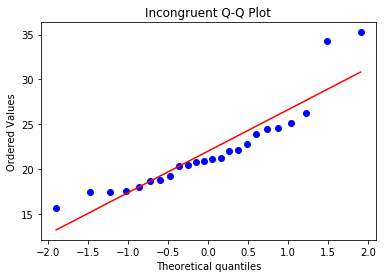

In [108]:
stats.probplot(df['Incongruent'], plot= plt)
plt.title('Incongruent Q-Q Plot')

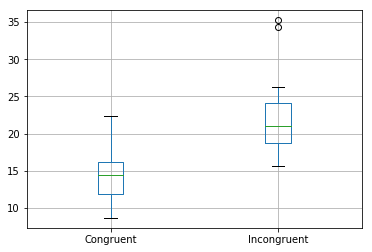

In [109]:
df.boxplot()

In [110]:
# Test if the data is normally distributed using the Shapiro Wilk test
print("Incongruent: " + str(stats.shapiro(df['Incongruent'])))
print("Congruent: " + str(stats.shapiro(df['Congruent'])))

Incongruent: (0.85394686460495, 0.0025900385808199644)
Congruent: (0.970922589302063, 0.689803421497345)


In [112]:
# Test if the data is normally distributed using the D’Agostino and Pearson’s test
print("Incongruent: " + str(stats.normaltest(df['Incongruent'])))
print("Congruent: " + str(stats.normaltest(df['Congruent'])))

Incongruent: NormaltestResult(statistic=13.25613167714947, pvalue=0.0013227189654814804)
Congruent: NormaltestResult(statistic=0.8520702649598428, pvalue=0.653093396926963)


In [127]:
# Re-test if the transformed data is normally distributed using the Shapiro Wilk test
print("Incongruent: " + str(stats.shapiro(df['Incongruent'].apply(np.log))))
print("Congruent: " + str(stats.shapiro(df['Congruent'].apply(np.log))))

Incongruent: (0.927132248878479, 0.0841212049126625)
Congruent: (0.9763861298561096, 0.8211249113082886)


** With a value of .084 > .05 for the Incongruent data we fail to reject the null hypothesis that the data is normal.**

**Observations:**
* Both histograms are skewed right with a tail going off to the right.  Neither are symmetric and don't look normally distributed.
* The Shapiro Wilk Test - The Congruent data looks normally distributed based on a p-value of 0.69.  The Incongruent data does not look normally distributed based a p-value of .003.
* The D’Agostino and Pearson’s Test - The Congruent data looks normally distributed based on a p-value of 0.65.  The Incongruent data does not look normally distributed based a p-value of .002.
* In QQ plot if the data is normally distributed the data should be on the red line. There are outliers in each graph but most of the values are near the red line.
* The interquartile range for Congruent and Incongruent times do not overlap.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [128]:
#Calculating paired samples t-test using the transformed data
statistic, p_value = stats.ttest_rel(df["Incongruent"].apply(np.log), df["Congruent"].apply(np.log))
print("statistic = " + str(statistic))
print("p = " + str(p_value))

t = 8.909498543480943
p = 6.443767901563715e-09


**Based on the p-value of .0000000064, we can reject the null hypothesis and conclude that the alternative hypothesis is true at the 95% confidence level. The difference between mean times for congruent and incongruent word lists are different. This result did match my expectations.**

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**The test is used to examine interference on reading ability. According to this article https://www.pathwaysstudy.pitt.edu/codebook/stroop-sb.html, researchers use this test and the Trail Making Test for measuring cognitive dysfunction.  Additional data would be needed to determine if this difference is low or normal. We were only provided with the time information. We would need the Stroop scores for any futher analysis.  Results are impacted by motor speech problems, reading skill level, english as a second language, and injuries to the brain.**